
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
data1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/snehadharne35@gmail.com/Salary.csv")
data2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/snehadharne35@gmail.com/DataScience_salaries_2024.csv")

In [0]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Data Exploration") \
    .getOrCreate()

# Data Cleaning
data1.show(n=5) 


+----+------+---------------+-----------------+-------------------+--------+-------+--------+------+
| Age|Gender|Education Level|        Job Title|Years of Experience|  Salary|Country|    Race|Senior|
+----+------+---------------+-----------------+-------------------+--------+-------+--------+------+
|32.0|  Male|              1|Software Engineer|                5.0| 90000.0|     UK|   White|     0|
|28.0|Female|              2|     Data Analyst|                3.0| 65000.0|    USA|Hispanic|     0|
|45.0|  Male|              3|          Manager|               15.0|150000.0| Canada|   White|     1|
|36.0|Female|              1|  Sales Associate|                7.0| 60000.0|    USA|Hispanic|     0|
|52.0|  Male|              2|         Director|               20.0|200000.0|    USA|   Asian|     0|
+----+------+---------------+-----------------+-------------------+--------+-------+--------+------+
only showing top 5 rows



In [0]:

data2.show(n=5) 

+---------+----------------+---------------+--------------------+--------+---------------+-------------+------------------+------------+----------------+------------+
|work_year|experience_level|employment_type|           job_title|  Salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+---------+----------------+---------------+--------------------+--------+---------------+-------------+------------------+------------+----------------+------------+
|     2021|              MI|             FT|      Data Scientist|30400000|            CLP|        40038|                CL|         100|              CL|           L|
|     2021|              MI|             FT|     BI Data Analyst|11000000|            HUF|        36259|                HU|          50|              US|           L|
|     2020|              MI|             FT|      Data Scientist|11000000|            HUF|        35735|                HU|          50|              HU|           L

In [0]:
print("\nData_1 schema:")
data1.printSchema()
print("\nData_2 schema:")
data2.printSchema()


Data_1 schema:
root
 |-- Age: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education Level: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Years of Experience: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Senior: string (nullable = true)


Data_2 schema:
root
 |-- work_year: string (nullable = true)
 |-- experience_level: string (nullable = true)
 |-- employment_type: string (nullable = true)
 |-- job_title: string (nullable = true)
 |-- Salary: string (nullable = true)
 |-- salary_currency: string (nullable = true)
 |-- salary_in_usd: string (nullable = true)
 |-- employee_residence: string (nullable = true)
 |-- remote_ratio: string (nullable = true)
 |-- company_location: string (nullable = true)
 |-- company_size: string (nullable = true)



In [0]:
print("Columns and data types of data_1:\n")
data1.dtypes



Columns and data types of data_1:

Out[14]: [('Age', 'string'),
 ('Gender', 'string'),
 ('Education Level', 'string'),
 ('Job Title', 'string'),
 ('Years of Experience', 'string'),
 ('Salary', 'string'),
 ('Country', 'string'),
 ('Race', 'string'),
 ('Senior', 'string')]

In [0]:
print("\nColumns and data types of data_2:")
data2.dtypes


Columns and data types of data_2:
Out[15]: [('work_year', 'string'),
 ('experience_level', 'string'),
 ('employment_type', 'string'),
 ('job_title', 'string'),
 ('Salary', 'string'),
 ('salary_currency', 'string'),
 ('salary_in_usd', 'string'),
 ('employee_residence', 'string'),
 ('remote_ratio', 'string'),
 ('company_location', 'string'),
 ('company_size', 'string')]

In [0]:
# Display summary statistics for numeric columns
print("Summary statistics:")
data1.describe().show()


Summary statistics:
+-------+-----------------+------+------------------+-----------------+-------------------+------------------+---------+----------------+-------------------+
|summary|              Age|Gender|   Education Level|        Job Title|Years of Experience|            Salary|  Country|            Race|             Senior|
+-------+-----------------+------+------------------+-----------------+-------------------+------------------+---------+----------------+-------------------+
|  count|             6684|  6684|              6684|             6684|               6684|              6684|     6684|            6684|               6684|
|   mean|33.61056253740275|  null|1.6223818073010174|             null|  8.077722920406941|115307.17519449431|     null|            null|0.14347695990424894|
| stddev| 7.59599442279384|  null|0.8804739791134207|             null|   6.02930487486788|   52806.810881151|     null|            null| 0.3505848121738637|
|    min|             21.0|Femal

In [0]:
print("Summary statistics:")
data2.describe().show()


Summary statistics:
+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+-----------------+----------------+------------+
|summary|         work_year|experience_level|employment_type|           job_title|            Salary|salary_currency|     salary_in_usd|employee_residence|     remote_ratio|company_location|company_size|
+-------+------------------+----------------+---------------+--------------------+------------------+---------------+------------------+------------------+-----------------+----------------+------------+
|  count|             14838|           14838|          14838|               14838|             14838|          14838|             14838|             14838|            14838|           14838|       14838|
|   mean|2023.1389001213101|            null|           null|                null|165022.71896482006|           null|149874.71876263648|              null|32.760479

In [0]:
# Count the number of rows in the DataFrame
print("Number of rows in data_1:")
data1.count()



Number of rows in data_1:
Out[21]: 6684

In [0]:
print("Number of rows in data_2:\n")
data2.count()

Number of rows in data_2:

Out[22]: 14838

In [0]:
# Merge DataFrames on the 'salary' column
merged_df = data1.join(data2, "Salary", "inner")

# Show the merged DataFrame
merged_df.show()

+------+---+------+---------------+---------+-------------------+-------+----+------+---------+----------------+---------------+---------+---------------+-------------+------------------+------------+----------------+------------+
|Salary|Age|Gender|Education Level|Job Title|Years of Experience|Country|Race|Senior|work_year|experience_level|employment_type|job_title|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size|
+------+---+------+---------------+---------+-------------------+-------+----+------+---------+----------------+---------------+---------+---------------+-------------+------------------+------------+----------------+------------+
+------+---+------+---------------+---------+-------------------+-------+----+------+---------+----------------+---------------+---------+---------------+-------------+------------------+------------+----------------+------------+



In [0]:
# Define the path where the CSV will be saved
output_path = '/FileStore/tables/Merged_data/merged_data.csv'

# Write the DataFrame to a CSV file
merged_df.write.csv(output_path, mode='overwrite', header=True)


In [0]:
# Stop the Spark session
spark.stop()

In [0]:
# File location and type
file_location = "/FileStore/tables/Merged_data/merged_data.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "false"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

display(df)

In [0]:
# Create a view or table

temp_table_name = "merged_data_csv"

df.createOrReplaceTempView(temp_table_name)

In [0]:
%sql

/* Query the created temp table in a SQL cell */

select * from `merged_data_csv`

In [0]:
# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

permanent_table_name = "merged_data_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

In [0]:
# analyzing the dataset using the MapReduce programming model with PySpark to estimate the effect of race and country on technology salaries
# setting up the PySpark environment
pip install pyspark


Python interpreter will be restarted.
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488511 sha256=47798af0fccb950efa9fc821361885f665059d8ce6bdafb1987e83acdef83e17
  Stored in directory: /root/.cache/pip/wheels/92/09/11/aa01d01a7f005fda8a66ad71d2be7f8aa341bddafb27eee3c7
Successfully built pyspark
Python interpreter will be restarted.


In [0]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Technology Salaries Analysis") \
    .getOrCreate()


In [0]:
# loading datasets
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/snehadharne35@gmail.com/merged_data.csv")

In [0]:
df1.show()  # Show initial rows to verify the load


+---+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+----+------+---------------+--------------------+-------------------+-------+-----+------+
|_c0|work_year|experience_level|employment_type|           job_title|Salary|salary_currency|salary_in_usd|employee_residence|remote_ratio|company_location|company_size| Age|Gender|Education Level|           Job Title|Years of Experience|Country| Race|Senior|
+---+---------+----------------+---------------+--------------------+------+---------------+-------------+------------------+------------+----------------+------------+----+------+---------------+--------------------+-------------------+-------+-----+------+
|  0|     2024|              MI|             FT|   Applied Scientist|250000|            USD|       250000|                US|           0|              US|           M|50.0|  Male|              1|                 CEO|      

In [0]:
# Drop rows with missing values in specific columns needed for the analysis
df1 = df1.dropna(subset=["salary", "country", "race"])


In [0]:
from pyspark.sql import functions as F

# Group by country and race, then calculate the average salary
result_df = df1.groupBy("country", "race").agg(F.avg("salary").alias("average_salary"))

# Show the result
result_df.show()


+---------+----------------+------------------+
|  country|            race|    average_salary|
+---------+----------------+------------------+
|    China|          Korean|117072.10186481239|
|Australia|      Australian|114420.57093048595|
|       UK|           Asian|115999.16411256617|
|   Canada|           Asian|116096.22264795494|
|      USA|        Hispanic|113411.36336901541|
|       UK|           Mixed|117753.91211633521|
|       UK|           Welsh|109655.99356395817|
|   Canada|           White|118392.25412572737|
|      USA|           Asian|116071.84455450933|
|    China|         Chinese|113512.79347028614|
|      USA|           White|113687.59811616954|
|       UK|           White|118985.75054805585|
|Australia|           Asian|116959.98979721974|
|Australia|           White|117347.02702702703|
|   Canada|           Black|119465.36303051561|
|    China|           White|117838.42890579285|
|      USA|African American|113672.52195734002|
+---------+----------------+------------

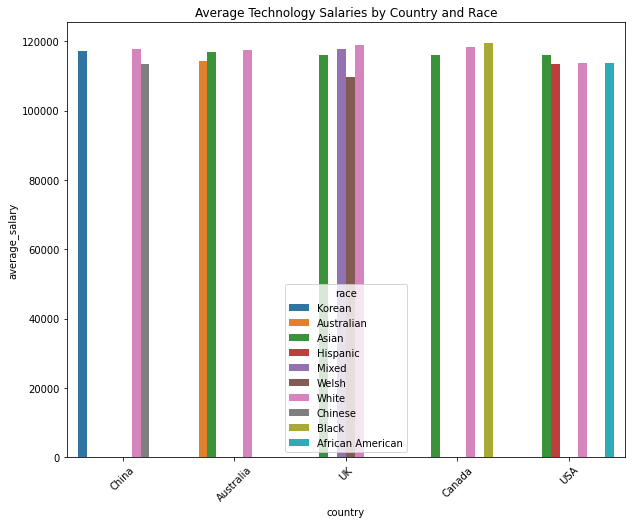

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame
result_pd = result_df.toPandas()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='country', y='average_salary', hue='race', data=result_pd)
plt.title('Average Technology Salaries by Country and Race')
plt.xticks(rotation=45)
plt.show()


In [0]:
spark.stop()


In [0]:
# investigating the link between educational attainment, experience, and salary in the technology sector using the PySpark framework and the MapReduce programming model
# analyzing the relationships using grouping and aggregation techniques.
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder \
    .appName("Education and Experience Analysis") \
    .getOrCreate()


In [0]:
# loading datasets
df2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/snehadharne35@gmail.com/merged_data.csv")

In [0]:
# Clean data by dropping rows where essential columns are missing
df2 = df2.dropna(subset=["Salary", "Education Level", "Years of Experience"])

# Check data types and convert if necessary
df2 = df2.withColumn("Salary", df2["Salary"].cast("float"))
df2 = df2.withColumn("Years of Experience", df2["Years of Experience"].cast("integer"))


In [0]:
# Use PySpark’s DataFrame API to explore the relationship 
from pyspark.sql import functions as F

# Group by education level and years of experience, then calculate the average salary
analysis_df = df2.groupBy("Education Level", "Years of Experience").agg(
    F.avg("salary").alias("average_salary")
)

# Display the aggregated DataFrame
analysis_df.show()


+---------------+-------------------+------------------+
|Education Level|Years of Experience|    average_salary|
+---------------+-------------------+------------------+
|              3|                 13|160038.30369357046|
|              3|                  8| 133278.4041630529|
|              3|                 21|          180000.0|
|              2|                 20|184106.96517412935|
|              3|                 19| 194296.1452928095|
|              1|                  7|110903.31686661961|
|              2|                 17|          170000.0|
|              1|                 10|119294.25064599483|
|              2|                 12|140172.72881069194|
|              3|                 20| 197956.0585885486|
|              2|                 21|174037.99019607843|
|              3|                  6|104153.91156462584|
|              3|                 11|151637.96330962187|
|              3|                  5|115248.79614767255|
|              1|              

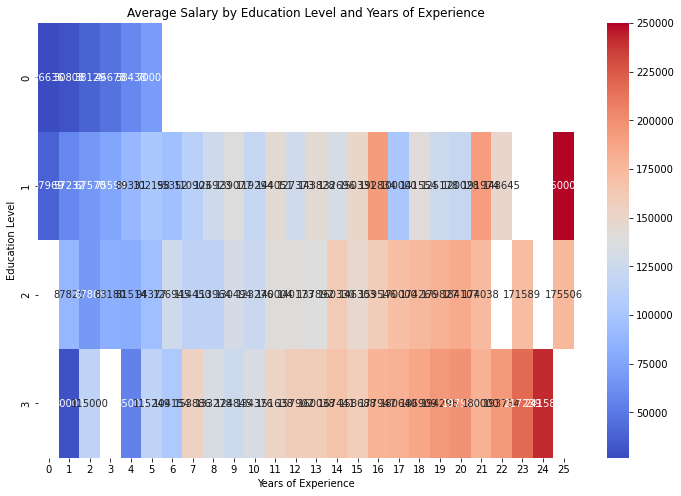

In [0]:
# visualizing the Results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas DataFrame for visualization
result_pd = analysis_df.toPandas()

# Create a pivot table for better visualization
pivot_table = result_pd.pivot("Education Level", "Years of Experience", "average_salary")

# Plot the pivot table with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f")
plt.title('Average Salary by Education Level and Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Education Level')
plt.show()


In [0]:
# Stop the Spark session
spark.stop()


In [0]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder \
    .appName("Compensation Gaps Analysis") \
    .getOrCreate()


In [0]:
# loading datasets
df3 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/snehadharne35@gmail.com/merged_data.csv")

In [0]:
# Drop rows where relevant columns are missing
df3 = df3.dropna(subset=["salary", "country", "race", "gender", "employee_residence"])


In [0]:
# Analyzing the Data with MapReduce
from pyspark.sql import functions as F

# Group by country, race, and gender, then calculate the average and standard deviation of salaries
compensation_analysis_df = df3.groupBy("country", "race", "gender").agg(
    F.avg("salary").alias("average_salary"),
    F.stddev("salary").alias("salary_std_dev")
)

# Show the result
compensation_analysis_df.show()


+---------+----------------+------+------------------+------------------+
|  country|            race|gender|    average_salary|    salary_std_dev|
+---------+----------------+------+------------------+------------------+
|      USA|           White|Female|108694.40144478844|43668.821196080295|
|    China|          Korean|Female|114735.37017922492|  41716.0443843945|
|Australia|           White|Female|113311.69522187933|  43226.1175404624|
|       UK|           Mixed|Female|115217.86904426276| 47094.55818644188|
|Australia|           White|  Male|120809.09339906875| 46424.54410848762|
|      USA|        Hispanic|Female|108593.65303244005| 44924.29693524157|
|Australia|      Australian|  Male|116677.48302542239|46226.560213577824|
|   Canada|           Black|  Male|124798.88575015694|45053.451687088214|
|    China|         Chinese|  Male|113513.52007772021| 44958.31131691745|
|      USA|African American|  Male|115121.10373019929| 42786.54961422336|
|Australia|           Asian|  Male| 12

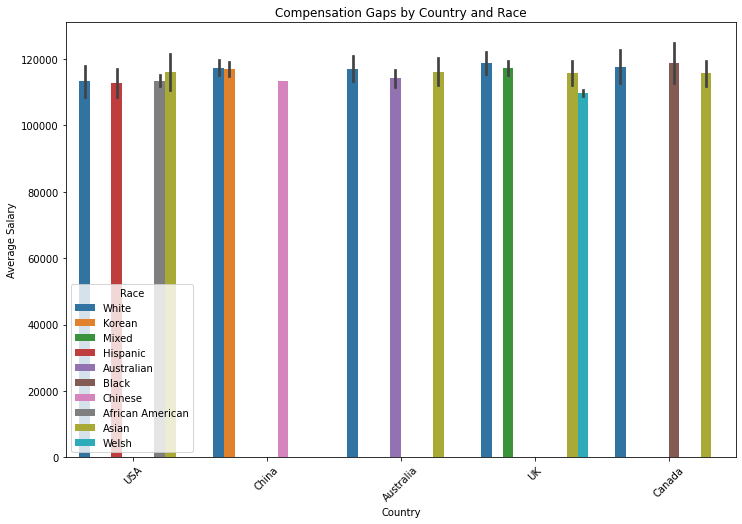

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Spark DataFrame to Pandas DataFrame for visualization
result_pd = compensation_analysis_df.toPandas()

# Plotting the average salary by demographics using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x="country", y="average_salary", hue="race", data=result_pd)
plt.title('Compensation Gaps by Country and Race')
plt.xticks(rotation=45)
plt.ylabel('Average Salary')
plt.xlabel('Country')
plt.legend(title='Race')
plt.show()


In [0]:
# Stop the Spark session
spark.stop()
